# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов и поучаствовать в соревновании на Kaggle!
Первым делом вам предстоит построить хороший бейзлайн, а дальше пытаться улучшать, соревнуясь с другими участниками.


Ссылка на соревнование: https://www.kaggle.com/c/avito-category-prediction/overview
Данные для домашнего задания можно скачать на странице соревнования.
Чтобы ваше участие было засчитано, убедитесь, что имя в Leaderboard имеет вид: «Имя Фамилия номер_группы».

Оценивание:

Домашнее задание оценивается как обычно. Баллы указаны напротив заданий.

За соревнование даются бонусные баллы следующим образом.
Если вы пересекли baseline_2 на приватном лидерборде, ваша оценка равна 

10 - 10 * (i - 1) / M

где M — количество студентов, принявших участие в соревновании;

i — место (начиная с 1) студента в приватном лидерборде среди всех таких студентов.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

* В течение 3 суток после окончания соревнования в соответствующее задание на anytask необходимо прислать код, воспроизводящий ответы для посылки, фигурирующей в приватном лидерборде. В случае отсутствия кода, воспроизводящего результат, в установленный срок студенту выставляется 0 в качестве оценки за соревнование. Если не оговорено иное, использовать любые внешние данные в соревнованиях '''запрещено'''. Под внешними данными понимаются размеченные данные, где разметка имеет прямое отношение к решаемой задаче. Грубо говоря, сборник текстов с википедии не считается внешними данными.


Мы будем работать с датасетом объявлений Avito. Нам предстоит по заголовку и тексту объявления предсказывать категорию объявления.

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('avito-text-classification/train.csv')
test = pd.read_csv('avito-text-classification/test.csv')

In [3]:
train.head()

,title,description,Category_name,Category
0,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 год","Комплект ЭБУ (мозги, компьютер мотора, двигате...",Запчасти и аксессуары,10
1,Утюг утп 1000 ватт СССР 1987 год,Продам/\n Фото № 1-2 /\n /\nУтюг УТП 1000 ватт...,Бытовая техника,21
2,Возвму машину с выкупом,Возьму машину в аренду с последующим выкупом н...,Предложение услуг,114
3,Полусапожки,"полусапожки в отличном состоянии, один раз оде...","Одежда, обувь, аксессуары",27
4,Босоножки кожаные,"Кожаные(натур) босоножки Karlo Pasolini, 40 рр...","Одежда, обувь, аксессуары",27


In [4]:
train.shape

(4234042, 4)

## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [5]:
# Посмотрим, сколько пропусков
train.isnull().values.sum()

2

In [6]:
train = train.fillna("")
train.isnull().values.sum() > 0

False

## Задание 2 (0.5 балла)
Сконкатенируйте заголовок и описание в единую строку и поместите результат в отдельный столбец. Таким образом мы будет работать с одним текстом, а не с двумя.

In [7]:
train['text'] = train.apply(lambda x: x['title'] + "\n" + x['description'], axis=1)
train = train.drop(['title', 'description'], axis=1)
train.head()

,Category_name,Category,text
0,Запчасти и аксессуары,10,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 ..."
1,Бытовая техника,21,Утюг утп 1000 ватт СССР 1987 год\nПродам/\n Фо...
2,Предложение услуг,114,Возвму машину с выкупом\nВозьму машину в аренд...
3,"Одежда, обувь, аксессуары",27,"Полусапожки\nполусапожки в отличном состоянии,..."
4,"Одежда, обувь, аксессуары",27,Босоножки кожаные\nКожаные(натур) босоножки Ka...


## Задание 3 (0.5 балла)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Сколько всего уникальных классов необходимо предсказать?
2. Постройте столбчатую диаграмму распределения по классам. Нормализуйте график, чтобы видеть доли, а не абсолютные значения.
3. На сколько большой дисбаланс? Какой класс имеет самую большую долю в выборке (укажите класс и долю), какой класс наименьшую (укажите класс и долю).

In [8]:
print(len(train['Category_name'].unique()))
train['Category_name'].unique()

50


array(['Запчасти и аксессуары', 'Бытовая техника', 'Предложение услуг',
       'Одежда, обувь, аксессуары', 'Детская одежда и обувь',
       'Автомобили', 'Резюме', 'Спорт и отдых', 'Кошки',
       'Мебель и интерьер', 'Товары для животных', 'Коллекционирование',
       'Оргтехника и расходники', 'Товары для компьютера', 'Телефоны',
       'Ремонт и строительство', 'Товары для детей и игрушки',
       'Продукты питания', 'Аудио и видео', 'Грузовики и спецтехника',
       'Квартиры', 'Посуда и товары для кухни', 'Вакансии',
       'Другие животные', 'Коммерческая недвижимость', 'Часы и украшения',
       'Оборудование для бизнеса', 'Фототехника',
       'Игры, приставки и программы', 'Книги и журналы',
       'Музыкальные инструменты', 'Красота и здоровье',
       'Планшеты и электронные книги', 'Дома, дачи, коттеджи',
       'Гаражи и машиноместа', 'Земельные участки', 'Охота и рыбалка',
       'Растения', 'Водный транспорт', 'Велосипеды',
       'Настольные компьютеры', 'Ноутбуки', 'М

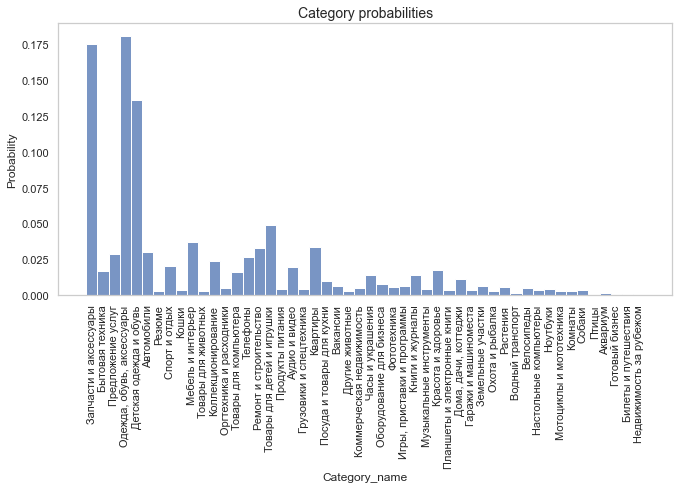

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(11,5)}, style="whitegrid")
sns.histplot(data=train,x="Category_name",stat="probability")
plt.title('Category probabilities', fontsize=14)
plt.grid(b=None)
plt.xticks(rotation='vertical')
plt.show()

In [10]:
import numpy as np
categories = pd.DataFrame(train.groupby('Category_name')['text'].count()/train.shape[0]).sort_values(by='text')
(categories.head(1), categories.tail(1))

(                             text
 Category_name                    
 Недвижимость за рубежом  0.000039,
                                text
 Category_name                      
 Одежда, обувь, аксессуары  0.180707)

#### Дисбаланс достаточно большой, что видно как по графику, так и по значениям. Три самые популярные категории значительно выделяются на фоне остальных

## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью. Для test части нам неизвестны истинные значения, и они понадобятся только тогда, когда мы будем отправлять решение на Kaggle.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cnt_vec = CountVectorizer()
X = cnt_vec.fit_transform(train['text'].to_numpy())
X.shape

(4234042, 2125805)

## Задание 5 (0.5 балла)

В предыдущем пункте у вас должная была получится очень большая матрица. Это не дело.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле _vocabulary инстанса этого класса.

1. Найдите в этом словаре все слова, которые начинаются на цифру. Сколько таких слов нашлось?

2. Найдите все слова, которые начинаются на символы пунктуации. Сколько таких слов нашлось? 

In [12]:
import string
(len([v for k,v in cnt_vec.vocabulary_.items() if k[0].isdigit()]), 
    len([v for k,v in cnt_vec.vocabulary_.items() if k[0] in string.punctuation]))

(610944, 2043)

## Задание 6 (2.5 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью word_tokenizer из пакета nltk
2. Удалит все токены содержащие числа и пунктуацию
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords('russian')
4. Проведет стемминг с помощью SnowballStemmer

Продемонстрируйте работу вашей функии на самом первом описании товара в датасете.

Важно: так как функию будет необходимо запускать на большом корпусе, подумайте об эффективной реализации. Постарайтесь решить задачу в минимальное количество циклов и копирований.

Референсная реализация на компьютере автора работала 230 секунд на 100к строчек.

In [13]:
import nltk
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

class CustomTokenizer:
    def __init__(self, texts: np.array):
        self.texts = texts
    
    def tokenize(self) -> np.array:
        noise = stopwords.words('russian')
        stemmer = SnowballStemmer('russian')
        return [' '.join([stemmer.stem(w.lower()) for w in word_tokenize(t) if w.isalpha() 
                          and w not in noise]) for t in self.texts]

In [14]:
tokenizer = CustomTokenizer(texts=[train['text'].to_numpy()[0]])
processed = tokenizer.tokenize()
processed

['эб renault nissan dci delphi год комплект эб мозг компьютер мотор двигател коммутатор электрон блок управлен двигател компьютер мотор рен kangoo канг канг мега сценик laguna лагун clio кли nissan micra нисса микр друг рен нисса дизел топливн аппаратур делф оригина отличн состоян проверен гарант на запчаст предоставля гарант возможн установк бол подробн раздел компан мы дорож сво репутац торгу тольк легальн контрактн запчаст дета налич таможен документ все запчаст автомобил без пробег по росс отправля друг регион таможен союз транспортн компан наложн платеж']

## Задание 7 (1 балл)

1. Возьмите случайные 500к строк из датасета. Постройте по ним CountVectorizer с применением вашего токенизатора.
2. Разбейте полученную матрицу на train, test в отношении 4 к 1. Не забудьте про target переменную.
3. Обучите SGDClassifier на полученной выборке.
4. Посчитайте метрику accuracy

In [15]:
np.random.seed(42)
df_selected = train.sample(n=500000, replace=False)
df_selected.head()

,Category_name,Category,text
382220,Мебель и интерьер,20,Прихожая\nВ хорошем состоянии. Торг
397529,Запчасти и аксессуары,10,Кордиант 215/55/16 Летние\nКордиант 215/55/16 ...
584569,Мебель и интерьер,20,"Стол\nСтол, 2 рабочих места . Стол серого цвет..."
2513100,"Одежда, обувь, аксессуары",27,Комбинезон\nРазмер-42/44
1091886,Детская одежда и обувь,29,Ветровка\nНа 2 года


In [16]:
# Разбиваем заранее, чтобы train не влиял на test,
# иначе слова, которые есть во одной выборке, могут попасть в другую, где их нет
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_selected['text'], df_selected['Category'], test_size=0.2)

In [17]:
train_tokenizer = CustomTokenizer(texts=x_train.to_numpy())
train_selected = train_tokenizer.tokenize()
train_selected

['пальт зимн зимн пальт размер в хорош состоян длин см мех съемн',
 'куртк девочк девочк размер отличн стира нос мал состоян нов вещ',
 'ремен безопасн ситро пикасс ремен безопасн citroen picasso прав лев шт',
 'зерка opel zafira b оригина водительсклю зеркальн элимент оригина gm водительск сторон нагревательн элимент цел откле',
 'ваз автомобил цел нормальн ход состоян средн передн стекл подъемник подогр передн сиден остальн телефон торг больш',
 'зерка прод зерка',
 'рюкзак прода рюкзак хорош состоян счит угл вытерт фот эт видн',
 'водолазк massimo dutti практическ нов водолазк massimo раз оказа мал',
 'золот кольц раухтопаз проб кольц выполн розов золот размер кольц размер площадк диаметр высот кольц вставк раухтопаз диаметр масс издел импортн издел хорош состоян прошл предпродажн звон пиш приезжа вопрос приветств возможн отправк курьерск служб в наш магазин вы может куп прода ювелирн издел час аксессуар возмож обм подробн куп может ознаком сайт магазин наш адрес реж работ карт прое

In [18]:
test_tokenizer = CustomTokenizer(texts=x_test.to_numpy())
test_selected = test_tokenizer.tokenize()
test_selected

['ремонт квартир частн бригад оп выполн отделочн работ люб район демонтаж стяжк перегородк штукатурк шпаклевк обо напольн покрыт плинтус мног друг приемлем цен',
 'картин отличн состоян',
 'картошк выращен картошк выращен удобрен химикат вкусн леж след урож разн сорт излишк собира заказ самовывоз тц ри',
 'жестк диск seagate sata жестк диск настольн компьютер sata hdd диск винч винчестер wd hd хдд сат ест гб гб гб провер хорош сматр пробег доп информац уточня сообщен',
 'свитер свитер кир пластинин худ рук бу цвет нежн розов',
 'мехов жилетк жилетк мехов тепл в хорош состоян на р кофточк заход профил вещ',
 'услуг хендлер подготовк ваш собак выставк занят возможн выезд занят зал демонстрац ринг выставк помощ ринг сравнен конкурс планирован выставочн индивидуальн подход кажд собак буд рад сотрудничеств',
 'веб камер веб камер',
 'фонар противотума задн прав hyundai creta фонар противотума hyundai creta задн прав марк модел год куз hyundai creta хенда хенда крет противотуманк туманк задн

In [19]:
cnt_vec = CountVectorizer()
bow_train = cnt_vec.fit_transform(train_selected) 
bow_test = cnt_vec.transform(test_selected)

In [20]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

cnt_vec_clf = SGDClassifier()
cnt_vec_clf.fit(bow_train, y_train)
pred_train = cnt_vec_clf.predict(bow_train)
pred_test = cnt_vec_clf.predict(bow_test)

(f"{accuracy_score(y_train, pred_train):.2f}", f"{accuracy_score(y_test, pred_test):.2f}")

('0.88', '0.85')

## Задание 8 (1 балл)

1. Повторите 7 задание, но с tf-idf векторизатором. Как изменилось качество.
2. Мы можем еще сильнее уменьшите размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer(max_df=0.9)
bow_train = tfidf_vec.fit_transform(train_selected) 
bow_test = tfidf_vec.transform(test_selected)

tfidf_vec_clf = SGDClassifier()
tfidf_vec_clf.fit(bow_train, y_train)
pred_train = tfidf_vec_clf.predict(bow_train)
pred_test = tfidf_vec_clf.predict(bow_test)

(f"{accuracy_score(y_train, pred_train):.2f}", f"{accuracy_score(y_test, pred_test):.2f}")

('0.85', '0.83')

## Задание 9 (1 балл)
Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 7 с HashingVectorizer, укажите количество фичей равное 30000.
2. Какой из трех подходов показал самый высокий результат?

In [22]:
from sklearn.feature_extraction.text import HashingVectorizer

hsh_vec = HashingVectorizer(n_features=30000)
bow_train = hsh_vec.fit_transform(train_selected) 
bow_test = hsh_vec.transform(test_selected)

hsh_vec_clf = SGDClassifier()
hsh_vec_clf.fit(bow_train, y_train)
pred_train = hsh_vec_clf.predict(bow_train)
pred_test = hsh_vec_clf.predict(bow_test)

(f"{accuracy_score(y_train, pred_train):.2f}", f"{accuracy_score(y_test, pred_test):.2f}")

('0.82', '0.82')

#### Лучшее качество осталось при обычном CountVectorizer-е, так как количество фичей было слишком большим, чтобы как-то повлиять, а значения, которые могли бы убраться при втором пункте, видимо, были убраны при токенизации

## Задание 10 (1.5 балла)

Пришло время выйти в мир. Отправляйтесь на Kaggle Inclass и сделайте первую посылку. Там вы найдете инструкцию как сформировать файл с предсказаниями и отправить его.

In [23]:
test.head()

,title,description,itemid
0,Мастерка,Мастерка фирмы форвард. Белого цвета. В идеаль...,1778449823
1,Зимние сапоги,"Продаю зимние сапоги, в хорошем состоянии, все...",1677656962
2,Видеонаблюдение 8 камер,В комплект Atis AMD-2MIR-8kit входит: /\n1. Ку...,1758182804
3,Запчасти для GLE,Запчасти GLE,1689811299
4,Бластер nerf,Состояние 5+/\nПродаю потому что не нужен/\n18...,1804706240


In [35]:
test_clf = SGDClassifier()
cnt_vec = CountVectorizer()
bow_train = cnt_vec.fit_transform(train_selected) 
test_clf.fit(bow_train, y_train) 

SGDClassifier()

In [36]:
test_titles = test.apply(lambda x: str(x['title']) + "\n" + str(x['description']), axis=1).to_numpy()
tokenizer = CustomTokenizer(texts=test_titles)
test_tokenized = tokenizer.tokenize()
bow_test = cnt_vec.transform(test_tokenized)

predictions = test_clf.predict(bow_test)
predictions

array([29, 29, 32, ..., 29, 84, 27])

In [37]:
test['Category'] = predictions
result = test.drop(['title', 'description'], axis=1)
result.rename(columns = {'itemid' : 'Id'}, inplace = True)
result.head()

,Id,Category
0,1778449823,29
1,1677656962,29
2,1758182804,32
3,1689811299,10
4,1804706240,30


In [38]:
result.to_csv('test_out_final.csv', index=False)